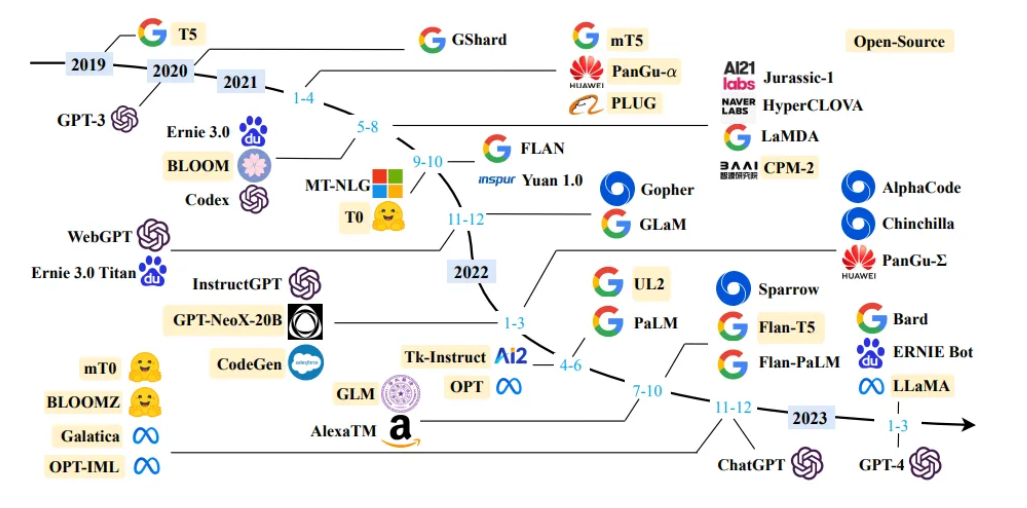

https://huggingface.co/spaces/HuggingFaceH4/open_llm_leaderboard

### Large Language Models (LLMs) are advanced artificial intelligence models that are trained on vast amounts of text data and are capable of understanding and generating human-like text. These models, such as OpenAI's GPT (Generative Pre-trained Transformer) series and Google's BERT (Bidirectional Encoder Representations from Transformers), have revolutionized natural language processing (NLP) tasks due to their ability to handle a wide range of language understanding tasks.


### Overview of Large Language Models:
#### Pre-training: LLMs are pre-trained on large corpora of text data using unsupervised learning techniques. During pre-training, the model learns to understand the structure and semantics of natural language by predicting missing words in a sentence or generating coherent text.
#### Fine-tuning: After pre-training, LLMs can be fine-tuned on specific downstream tasks with labeled data. Fine-tuning allows the model to adapt its knowledge to more specific tasks such as sentiment analysis, text classification, question answering, and language translation.
#### Transformer Architecture: Most LLMs are based on the transformer architecture, which relies on self-attention mechanisms to capture long-range dependencies in text. Transformers consist of multiple layers of attention mechanisms, allowing the model to process input sequences in parallel and capture context from both past and future tokens.

### Need for Large Language Models:
#### Handling Complex Language Tasks: LLMs excel at handling a wide range of language tasks, including text generation, summarization, translation, sentiment analysis, and more.
#### Contextual Understanding: LLMs can understand the context of a given text and generate responses or predictions that are contextually appropriate. This contextual understanding enables more accurate and natural language processing.
#### Scalability and Generalization: Large language models can generalize well across different languages, domains, and tasks. They can leverage the vast amount of pre-training data to learn rich representations of language that capture various linguistic patterns and nuances.

### Use Cases of Large Language Models:
#### Natural Language Understanding (NLU): LLMs are used for tasks such as sentiment analysis, named entity recognition, part-of-speech tagging, and text classification.
#### Text Generation: LLMs can generate coherent and contextually relevant text, making them useful for tasks such as chatbots, language translation, text summarization, and content creation.
#### Information Retrieval and Question Answering: LLMs can retrieve relevant information from large text corpora and answer questions posed in natural language, making them suitable for tasks like search engines and question-answering systems.
#### Language Translation: Large language models are employed in machine translation systems to translate text between different languages accurately and efficiently.
#### Content Creation and Personalization: LLMs can assist in content creation, copywriting, and personalization by generating text tailored to specific audiences and contexts.
#### Research and Innovation: LLMs are driving research and innovation in the field of natural language processing, enabling advancements in areas such as summarization, conversation modeling, and language understanding.

#### In summary, Large Language Models have become indispensable tools for handling a wide range of language tasks, enabling more natural and sophisticated interactions between humans and machines in various domains. Their scalability, generalization, and contextual understanding make them valuable assets in the field of natural language processing and AI.

# 1. Sequence-to-Sequence | Encoder Decoder | Sequence-to-Sequence Architecture

##  A Sequence-to-Sequence (Seq2Seq) model is a type of neural network architecture used for tasks involving sequences, such as machine translation, text summarization, and speech recognition. The model consists of two main components: an encoder and a decoder. Here's an overview of the Seq2Seq model along with its pros and cons:

## Overview:

## Encoder: The encoder takes an input sequence (e.g., a sentence in one language) and processes it into a fixed-size vector representation called the context vector. This context vector is intended to capture the semantic meaning of the input sequence.

## Decoder: The decoder takes the context vector generated by the encoder and produces the output sequence (e.g., a translated sentence). It does this step by step, generating one token at a time while conditioning its predictions on the previously generated tokens and the context vector.

## Attention Mechanism: Seq2Seq models often employ an attention mechanism, which helps the decoder focus on different parts of the input sequence when generating the output. This mechanism allows the model to better capture long-range dependencies.

## Pros:
## Variable-Length Inputs and Outputs: Seq2Seq models can handle variable-length input and output sequences, making them suitable for tasks like machine translation where the length of the input and output can vary.

## End-to-End Learning: Seq2Seq models enable end-to-end learning, meaning they learn to map input sequences directly to output sequences without the need for manual feature engineering.

## Flexibility: The architecture of Seq2Seq models is highly flexible and can be adapted to various sequence-to-sequence tasks by changing the input and output representations and adjusting the network architecture.

## State-of-the-Art Performance: Seq2Seq models, especially with advancements like attention mechanisms and transformer architectures, have achieved state-of-the-art performance in tasks such as machine translation, text summarization, and speech recognition.

## Cons:

## Data Efficiency: Seq2Seq models require a large amount of training data to generalize well, especially for tasks with complex linguistic patterns.

## Training Time: Training Seq2Seq models can be computationally expensive and time-consuming, particularly for large datasets and complex tasks.

## Exposure Bias: Seq2Seq models often suffer from exposure bias, where the model is trained to predict the next token based on ground truth during training but must rely on its own predictions during inference, leading to compounding errors over time.

## Difficulty with Rare Tokens: Seq2Seq models may struggle with generating rare or out-of-vocabulary tokens, as they may not have been adequately represented in the training data.

### Despite these limitations, Seq2Seq models remain a powerful and widely used approach for sequence-to-sequence tasks, particularly in natural language processing and speech recognition domains. Advances in model architectures and training techniques continue to address many of these challenges, leading to further improvements in performance and applicability.

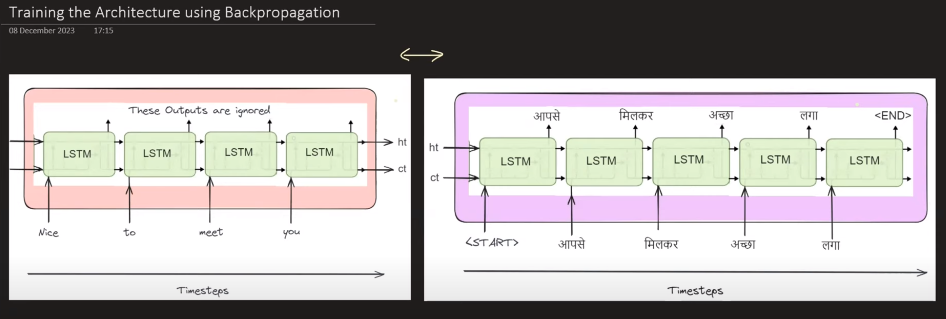

In [11]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

# English and Hindi dataset
english_texts = [
    'I love coffee', 'She likes tea', 'We drink milk',
    'He eats bread', 'They drink water', 'We like fruits',
    'She cooks rice', 'I want juice', 'He reads books',
    'We play games', 'They watch movies', 'She writes letters',
    'He sings songs', 'We dance together', 'They study hard',
    'She teaches English', 'He learns French', 'We speak Spanish',
    'They travel a lot', 'She works hard', 'He sleeps early',
    'We wake up late', 'They meet friends', 'She exercises daily',
    'He listens to music', 'We enjoy nature', 'They visit parks',
    'She climbs mountains', 'He swims in the sea', 'We hike in the forest'
]

hindi_texts = [
    'मुझे कॉफ़ी पसंद है', 'उसे चाय पसंद है', 'हम दूध पीते हैं',
    'वह रोटी खाता है', 'वे पानी पीते हैं', 'हम फल पसंद करते हैं',
    'वह चावल पकाती है', 'मुझे जूस चाहिए', 'वह किताबें पढ़ता है',
    'हम खेल खेलते हैं', 'वे फिल्में देखते हैं', 'वह पत्र लिखती है',
    'वह गाता है', 'हम साथ में नाचते हैं', 'वे मेहनत करते हैं',
    'वह अंग्रेज़ी सिखाती है', 'वह फ्रांसीसी सीखता है', 'हम स्पैनिश बोलते हैं',
    'वे बहुत सफ़र करते हैं', 'वह मेहनत करती है', 'वह जल्दी सोता है',
    'हम देर से उठते हैं', 'वे दोस्तों से मिलते हैं', 'वह दैनिक व्यायाम करती है',
    'वह संगीत सुनता है', 'हम प्रकृति का आनंद लेते हैं', 'वे पार्क जाते हैं',
    'वह पहाड़ चढ़ती है', 'वह समुद्र में तैरता है', 'हम जंगल में हाइक करते हैं'
]

# Define character-level tokenization for English
english_chars = sorted(set(''.join(english_texts)))
english_char_indices = dict((c, i) for i, c in enumerate(english_chars))
num_encoder_tokens = len(english_chars)
max_english_seq_length = max([len(txt) for txt in english_texts])

# Define character-level tokenization for Hindi
hindi_chars = sorted(set(''.join(hindi_texts)) | {'\n'})
hindi_char_indices = dict((c, i) for i, c in enumerate(hindi_chars))
num_decoder_tokens = len(hindi_chars)
max_hindi_seq_length = max([len(txt) for txt in hindi_texts])

# Initialize arrays to hold one-hot encoded data for encoder and decoder inputs
encoder_input_data = np.zeros(
    (len(english_texts), max_english_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(hindi_texts), max_hindi_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(hindi_texts), max_hindi_seq_length, num_decoder_tokens),
    dtype='float32')

# One-hot encode the input and target sequences for English and Hindi
for i, (english_text, hindi_text) in enumerate(zip(english_texts, hindi_texts)):
    for t, char in enumerate(english_text):
        encoder_input_data[i, t, english_char_indices[char]] = 1.
    for t, char in enumerate(hindi_text):
        decoder_input_data[i, t, hindi_char_indices[char]] = 1.
        if t > 0:
            decoder_target_data[i, t - 1, hindi_char_indices[char]] = 1.

# Define the Seq2Seq model
latent_dim = 256

# Encoder for English
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder for Hindi
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# Train the model
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=1,
          epochs=100)

# Define inference models

# Encoder model for English
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder model for Hindi
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Decode sequence
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    target_seq[0, 0, hindi_char_indices['\n']] = 1.

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = hindi_chars[sampled_token_index]
        decoded_sentence += sampled_char

        if (sampled_char == '\n' or
           len(decoded_sentence) > max_hindi_seq_length):
            stop_condition = True

        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        states_value = [h, c]

    return decoded_sentence

# Testing
for seq_index in range(len(input_texts)):
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

Epoch 1/100
30/30 [==============================] - 10s 44ms/step - loss: 2.1583
Epoch 2/100
30/30 [==============================] - 1s 44ms/step - loss: 1.9778
Epoch 3/100
30/30 [==============================] - 1s 46ms/step - loss: 1.9429
Epoch 4/100
30/30 [==============================] - 1s 42ms/step - loss: 1.9150
Epoch 5/100
30/30 [==============================] - 1s 38ms/step - loss: 1.8802
Epoch 6/100
30/30 [==============================] - 1s 37ms/step - loss: 1.8627
Epoch 7/100
30/30 [==============================] - 1s 36ms/step - loss: 1.8488
Epoch 8/100
30/30 [==============================] - 1s 39ms/step - loss: 1.8268
Epoch 9/100
30/30 [==============================] - 1s 40ms/step - loss: 1.8294
Epoch 10/100
30/30 [==============================] - 1s 40ms/step - loss: 1.7923
Epoch 11/100
30/30 [==============================] - 1s 37ms/step - loss: 1.7857
Epoch 12/100
30/30 [==============================] - 1s 36ms/step - loss: 1.7834
Epoch 13/100
30/30 [====

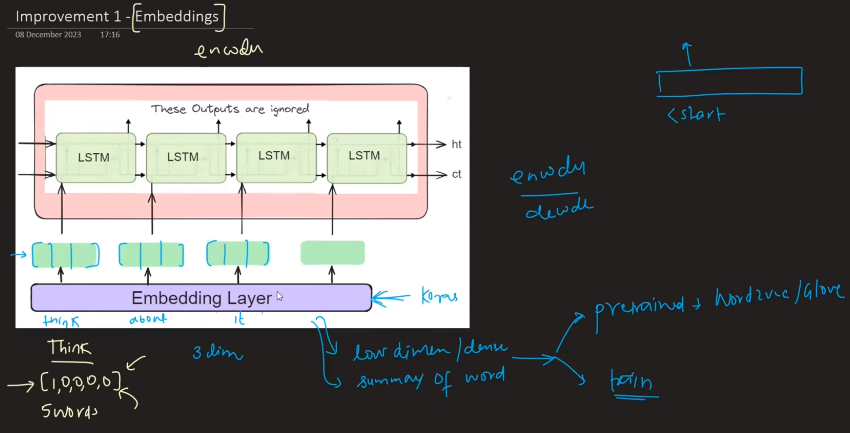

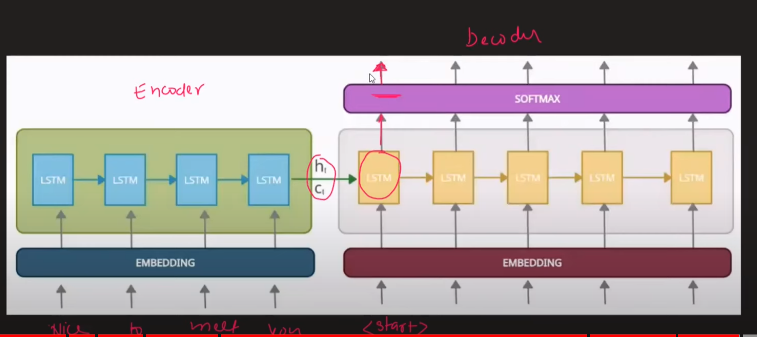

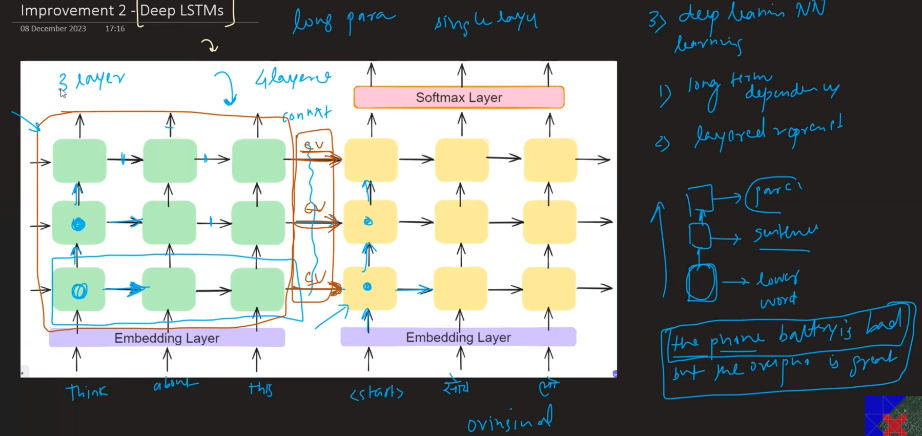

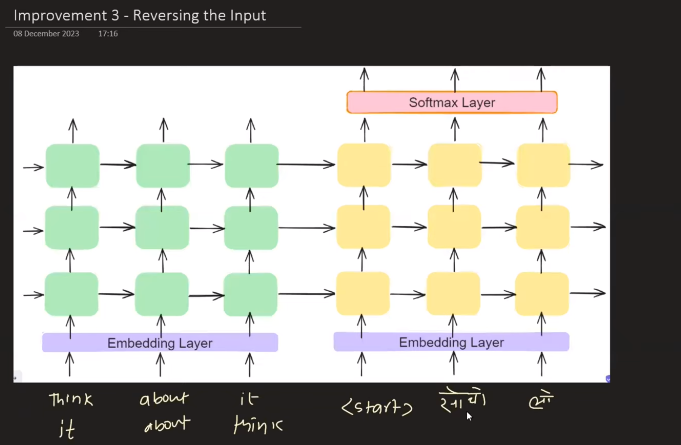